In [1]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

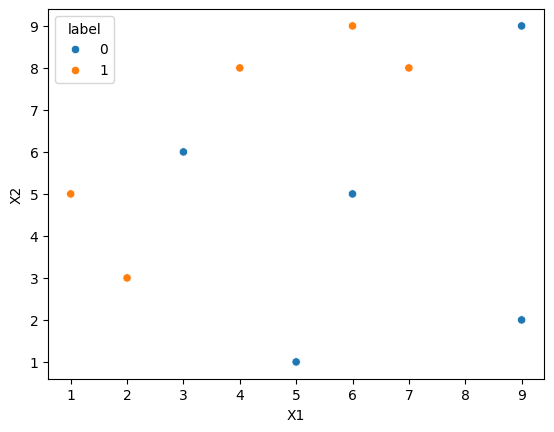

In [5]:
import seaborn as sns
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])

In [6]:
df['weights'] = 1/df.shape[0]

In [7]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [8]:
from sklearn.tree import DecisionTreeClassifier

df1 = DecisionTreeClassifier(max_depth=1)


In [9]:
X = df.iloc[:, 0:2].values
y = df.iloc[:,2].values

In [10]:
# step 2 - train the model
df1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

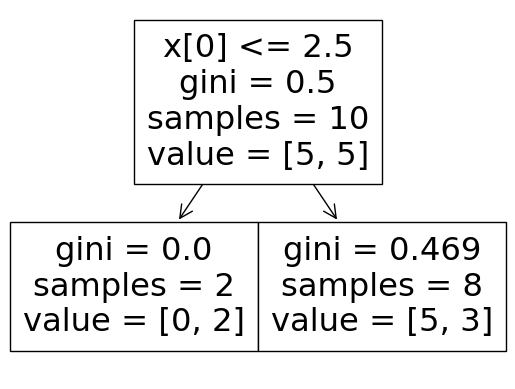

In [11]:
from sklearn.tree import plot_tree
plot_tree(df1)

<Axes: >

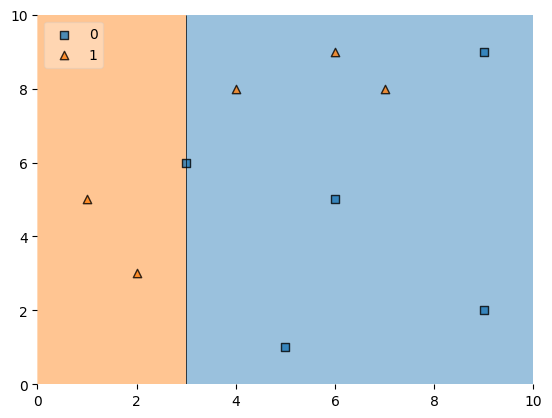

In [12]:
plot_decision_regions(X, y, clf=df1, legend=2)

In [13]:
df['y_pred'] = df1.predict(X)

df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [14]:
def calculate_model_weight(error):

    return 0.5* np.log((1-error)/(error))

In [15]:
# step 3 - calculate model weight

alpha1 = calculate_model_weight(0.3)

alpha1

0.42364893019360184

In [16]:
# step 4 - update weights

def update_row_weights(row, alpha=0.423):

    if row['label'] == row['y_pred']:    # here we decrease the wt of correct classified pts
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)  # here increse the wt of mis classified pts

In [17]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [18]:
df['updated_weights'].sum()

0.9165153319682015

In [19]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [20]:
df['normalized_weights'].sum()

1.0

In [21]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [22]:
df = df[[ 'X1',	'X2',	'label',	'weights',	'y_pred',   'updated_weights',	'normalized_weights','cumsum_lower',	'cumsum_upper'	]]

In [23]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.071475,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.071475,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.166559,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.071475,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.166559,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.071475,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.166559,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.071475,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.071475,0.928525,1.000000


In [24]:
def create_new_datasets(df):

    indices = []

    for i in range(df.shape[0]):
        a = np.random.random()

        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)

    return indices

In [25]:
index_values = create_new_datasets(df)

index_values

[8, 1, 5, 2, 0, 0, 3, 9, 9, 4]

In [26]:
second_df = df.iloc[index_values, [0,1,2,3]]

In [27]:
second_df

,X1,X2,label,weights
8,9,9,0,0.1
1,2,3,1,0.1
5,6,9,1,0.1
2,3,6,0,0.1
0,1,5,1,0.1
0,1,5,1,0.1
3,4,8,1,0.1
9,9,2,0,0.1
9,9,2,0,0.1
4,5,1,0,0.1


In [28]:
df2 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

In [29]:
df2.fit(X, y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

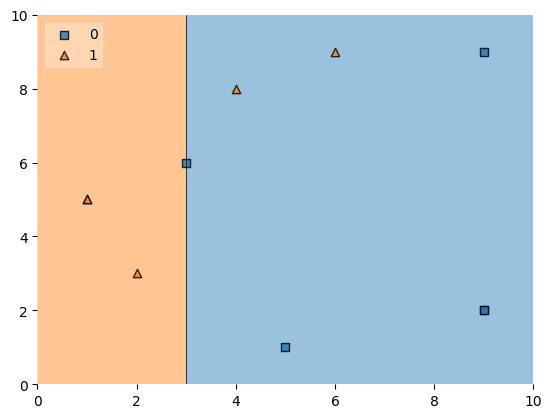

In [30]:
plot_decision_regions(X, y , clf=df2, legend=2)

In [31]:
second_df['y_pred'] = df2.predict(X)

In [32]:
second_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,0
1,2,3,1,0.1,1
5,6,9,1,0.1,0
2,3,6,0,0.1,0
0,1,5,1,0.1,1
0,1,5,1,0.1,1
3,4,8,1,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
4,5,1,0,0.1,0


In [33]:
alpha2 = calculate_model_weight(0.1)

In [34]:
alpha2

1.0986122886681098

In [35]:
# step 4 - update weights

def update_row_weights(row, alpha=1.098):

    if row['label'] == row['y_pred']:  
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [36]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

second_df

,X1,X2,label,weights,y_pred,updated_weights
8,9,9,0,0.1,0,0.033354
1,2,3,1,0.1,1,0.033354
5,6,9,1,0.1,0,0.299816
2,3,6,0,0.1,0,0.033354
0,1,5,1,0.1,1,0.033354
0,1,5,1,0.1,1,0.033354
3,4,8,1,0.1,0,0.299816
9,9,2,0,0.1,0,0.033354
9,9,2,0,0.1,0,0.033354
4,5,1,0,0.1,0,0.033354


In [37]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [38]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
8,9,9,0,0.1,0,0.033354,0.038494
1,2,3,1,0.1,1,0.033354,0.038494
5,6,9,1,0.1,0,0.299816,0.346023
2,3,6,0,0.1,0,0.033354,0.038494
0,1,5,1,0.1,1,0.033354,0.038494
0,1,5,1,0.1,1,0.033354,0.038494
3,4,8,1,0.1,0,0.299816,0.346023
9,9,2,0,0.1,0,0.033354,0.038494
9,9,2,0,0.1,0,0.033354,0.038494
4,5,1,0,0.1,0,0.033354,0.038494


In [39]:
second_df['normalized_weights'].sum()

1.0

In [40]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [41]:
second_df = second_df[[ 'X1',	'X2',	'label',	'weights',	'y_pred',   'updated_weights',	'normalized_weights','cumsum_lower',	'cumsum_upper'	]]

In [42]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_lower,cumsum_upper
8,9,9,0,0.1,0,0.033354,0.038494,0.000000,0.038494
1,2,3,1,0.1,1,0.033354,0.038494,0.038494,0.076988
5,6,9,1,0.1,0,0.299816,0.346023,0.076988,0.423012
2,3,6,0,0.1,0,0.033354,0.038494,0.423012,0.461506
0,1,5,1,0.1,1,0.033354,0.038494,0.461506,0.500000
0,1,5,1,0.1,1,0.033354,0.038494,0.500000,0.538494
3,4,8,1,0.1,0,0.299816,0.346023,0.538494,0.884518
9,9,2,0,0.1,0,0.033354,0.038494,0.884518,0.923012
9,9,2,0,0.1,0,0.033354,0.038494,0.923012,0.961506
4,5,1,0,0.1,0,0.033354,0.038494,0.961506,1.000000


In [43]:
index_values = create_new_datasets(second_df)


In [44]:
third_df = second_df.iloc[index_values, [0,1,2,3]]

In [45]:
third_df

,X1,X2,label,weights
2,3,6,0,0.1
0,1,5,1,0.1
9,9,2,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1


In [48]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

In [50]:
dt3.fit(X, y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

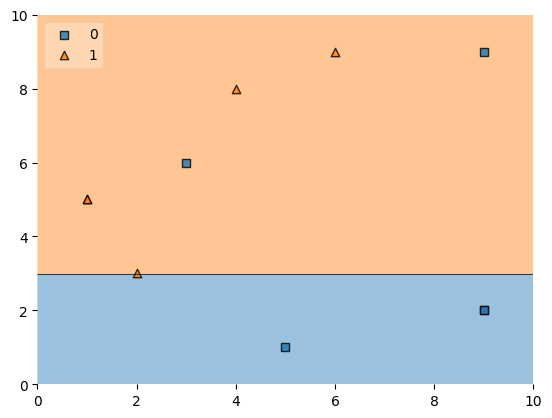

In [52]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [53]:
third_df['y_pred'] = dt3.predict(X)

In [54]:
third_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,1
0,1,5,1,0.1,1
9,9,2,0,0.1,1
9,9,2,0,0.1,1
2,3,6,0,0.1,1
4,5,1,0,0.1,1
2,3,6,0,0.1,1
4,5,1,0,0.1,0
2,3,6,0,0.1,0
0,1,5,1,0.1,0


In [55]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

## Prediction

In [58]:
query = np.array([1,5]).reshape(1,2)
df1.predict(query)

array([1], dtype=int64)

In [59]:
df2.predict(query)

array([1], dtype=int64)

In [60]:
dt3.predict(query)

array([1], dtype=int64)

In [61]:
alpha1*(1) + alpha2*(2) + alpha3*(1)

2.1972245773362196

In [62]:
np.sign(2.19)

1.0

In [63]:
query = np.array([9,9]).reshape(1,2)
df1.predict(query)

array([0], dtype=int64)

In [65]:
df2.predict(query)

array([0], dtype=int64)

In [66]:
dt3.predict(query)

array([1], dtype=int64)

In [67]:
alpha1*(1) + alpha2*(-1) + alpha3*(1)

-1.0986122886681096

In [68]:
np.sign(-1.09)

-1.0